In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import date
from datetime import datetime, timedelta
import holidays

In [2]:
df = pd.read_excel('Data_Train.xlsx')
df.dropna(inplace=True)
df = df.apply(lambda x: x.astype(str).str.upper())
df['Price'] = df['Price'].astype(int)
df=df[df['Price']<=50000]
df.loc[df['Source']=='DELHI','Source'] = 'NEW DELHI'
df.loc[df['Destination']=='DELHI','Destination'] = 'NEW DELHI'
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,INDIGO,24/03/2019,BANGLORE,NEW DELHI,BLR → DEL,22:20,01:10 22 MAR,2H 50M,NON-STOP,NO INFO,3897
1,AIR INDIA,1/05/2019,KOLKATA,BANGLORE,CCU → IXR → BBI → BLR,05:50,13:15,7H 25M,2 STOPS,NO INFO,7662
2,JET AIRWAYS,9/06/2019,NEW DELHI,COCHIN,DEL → LKO → BOM → COK,09:25,04:25 10 JUN,19H,2 STOPS,NO INFO,13882
3,INDIGO,12/05/2019,KOLKATA,BANGLORE,CCU → NAG → BLR,18:05,23:30,5H 25M,1 STOP,NO INFO,6218
4,INDIGO,01/03/2019,BANGLORE,NEW DELHI,BLR → NAG → DEL,16:50,21:35,4H 45M,1 STOP,NO INFO,13302


In [3]:
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x: re.sub('\s\d\d\s\w+','',x))
df['Duration'] = pd.to_timedelta(df['Duration'])
df['Duration'] =df['Duration'].dt.total_seconds().div(60).astype(int)
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Month'] = df['Date_of_Journey'].dt.month
df['Date'] = df['Date_of_Journey'].dt.day
df['Day_of_week'] = df['Date_of_Journey'].dt.dayofweek
df['Month'] = df['Month'].astype(str)
df['Day_of_week'] = df['Day_of_week'].astype(str)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Date,Day_of_week
0,INDIGO,2019-03-24,BANGLORE,NEW DELHI,BLR → DEL,22:20,01:10,170,NON-STOP,NO INFO,3897,3,24,6
1,AIR INDIA,2019-01-05,KOLKATA,BANGLORE,CCU → IXR → BBI → BLR,05:50,13:15,445,2 STOPS,NO INFO,7662,1,5,5
2,JET AIRWAYS,2019-09-06,NEW DELHI,COCHIN,DEL → LKO → BOM → COK,09:25,04:25,1140,2 STOPS,NO INFO,13882,9,6,4
3,INDIGO,2019-12-05,KOLKATA,BANGLORE,CCU → NAG → BLR,18:05,23:30,325,1 STOP,NO INFO,6218,12,5,3
4,INDIGO,2019-01-03,BANGLORE,NEW DELHI,BLR → NAG → DEL,16:50,21:35,285,1 STOP,NO INFO,13302,1,3,3


In [4]:
# holidays_list = list(sorted(holidays.IND(years=2019).keys()))
# print(holidays_list)

mean--> 9050.167322465804
mode--> 0    10262
dtype: int32
std--> 4404.027435463502


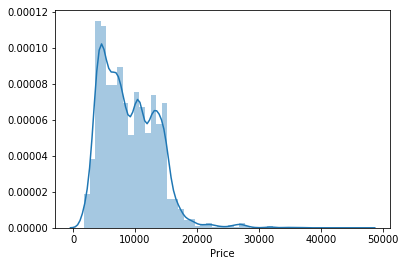

In [5]:
# df = df[df['Price']<=40000]
sns.distplot(df['Price'])
print('mean-->',df['Price'].mean())
print('mode-->',df['Price'].mode())
print('std-->',df['Price'].std())

In [6]:
# df['Dep_Time'] = pd.to_datetime(df['Dep_Time'],format='%H:%M').dt.time
# df['Dep_Time'].head()
df['Dep_Time'] =  df['Dep_Time'].apply(lambda x: x.split(':')[0])
df['Dep_Time'] = df['Dep_Time'].astype(int)
df['Dep_Time'].head()

0    22
1     5
2     9
3    18
4    16
Name: Dep_Time, dtype: int32

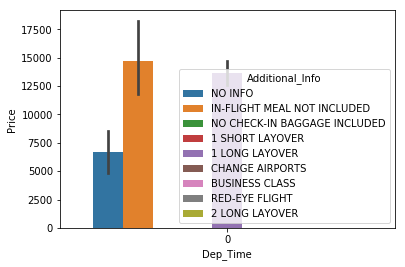

In [7]:
zx = df[df['Dep_Time']==0]
sns.barplot(x=zx['Dep_Time'],y=zx['Price'],hue='Additional_Info',data=df)

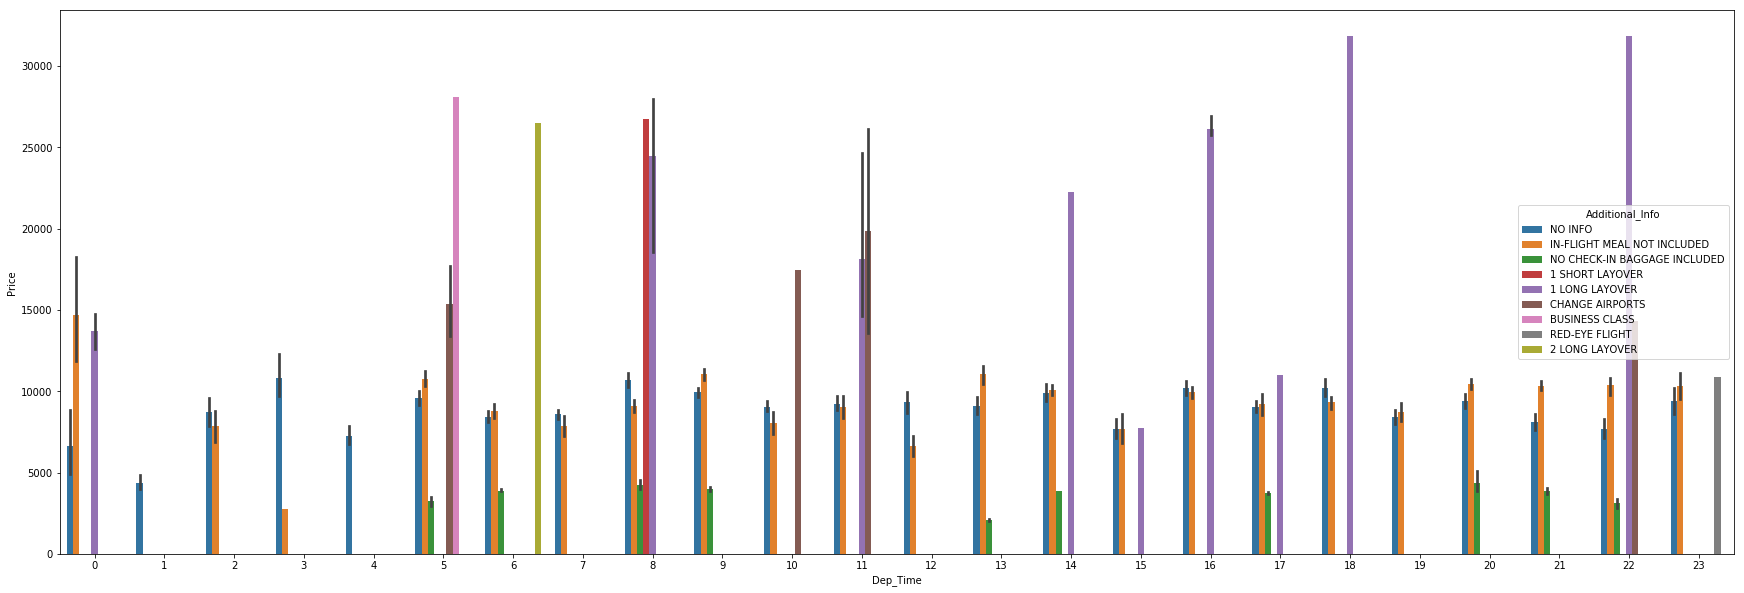

In [8]:
plt.figure(figsize=(30,10))
sns.barplot(x=df['Dep_Time'],y=df['Price'],data=df,hue='Additional_Info')

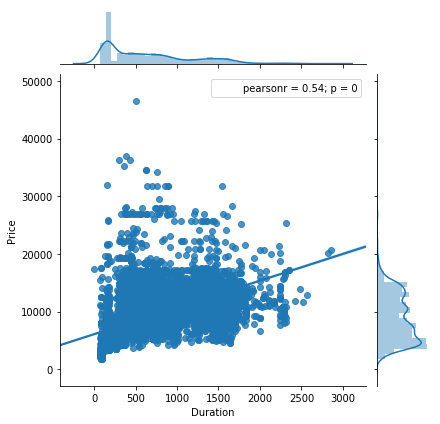

In [9]:
plt.figure(figsize=(20,10))
sns.jointplot(x=df['Duration'],y=df['Price'],data=df,kind='reg')

In [10]:
# holidays_list_2_before_after = []
# for i in holidays_list:
#     holidays_list_2_before_after.append(i-timedelta(days=1))
#     holidays_list_2_before_after.append(i-timedelta(days=2))
#     holidays_list_2_before_after.append(i+timedelta(days=1))
#     holidays_list_2_before_after.append(i+timedelta(days=2))
# df['IsHoliday'] = [1 if x in holidays_list_2_before_after else 0 for x in df['Date_of_Journey']]
# print(holidays_list)


In [11]:
df.to_csv('refined_data.psv',sep='|',index=False)
df = df.drop(['Date_of_Journey','Route'],axis=1)

df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Date,Day_of_week
0,INDIGO,BANGLORE,NEW DELHI,22,01:10,170,NON-STOP,NO INFO,3897,3,24,6
1,AIR INDIA,KOLKATA,BANGLORE,5,13:15,445,2 STOPS,NO INFO,7662,1,5,5
2,JET AIRWAYS,NEW DELHI,COCHIN,9,04:25,1140,2 STOPS,NO INFO,13882,9,6,4
3,INDIGO,KOLKATA,BANGLORE,18,23:30,325,1 STOP,NO INFO,6218,12,5,3
4,INDIGO,BANGLORE,NEW DELHI,16,21:35,285,1 STOP,NO INFO,13302,1,3,3


In [43]:
df[df['Duration']==5]

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Date,Day_of_week
6474,AIR INDIA,MUMBAI,HYDERABAD,16,16:55,5,2 STOPS,NO INFO,17327,6,3,0


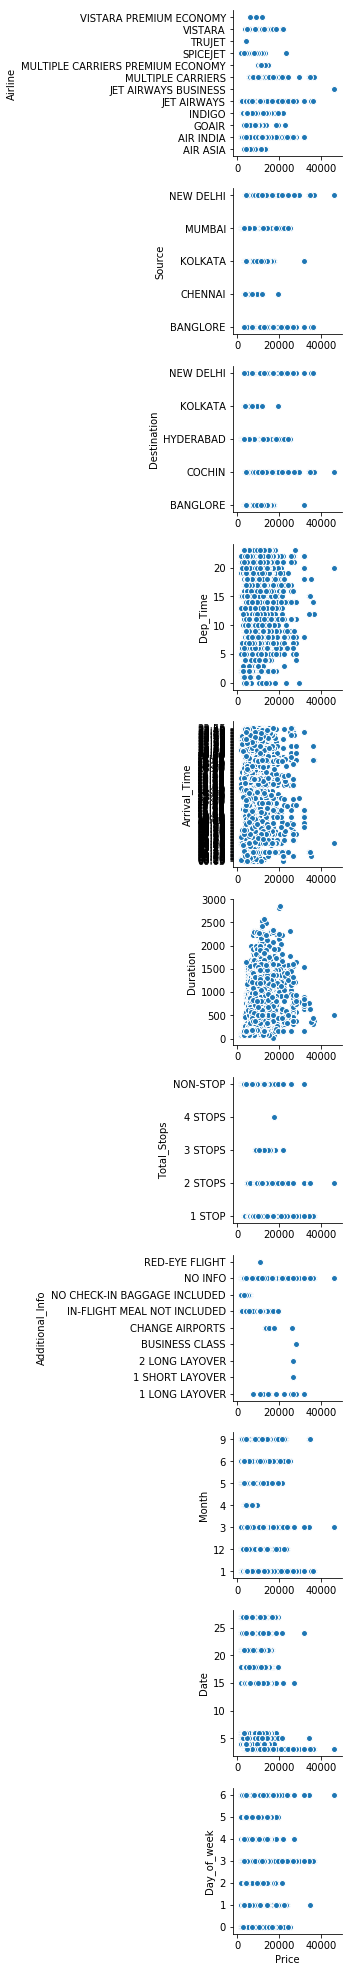

In [12]:
sns.pairplot(data=df,
                  x_vars=['Price'],
                  y_vars=['Airline','Source','Destination','Dep_Time','Arrival_Time','Duration','Total_Stops','Additional_Info','Month','Date','Day_of_week'])


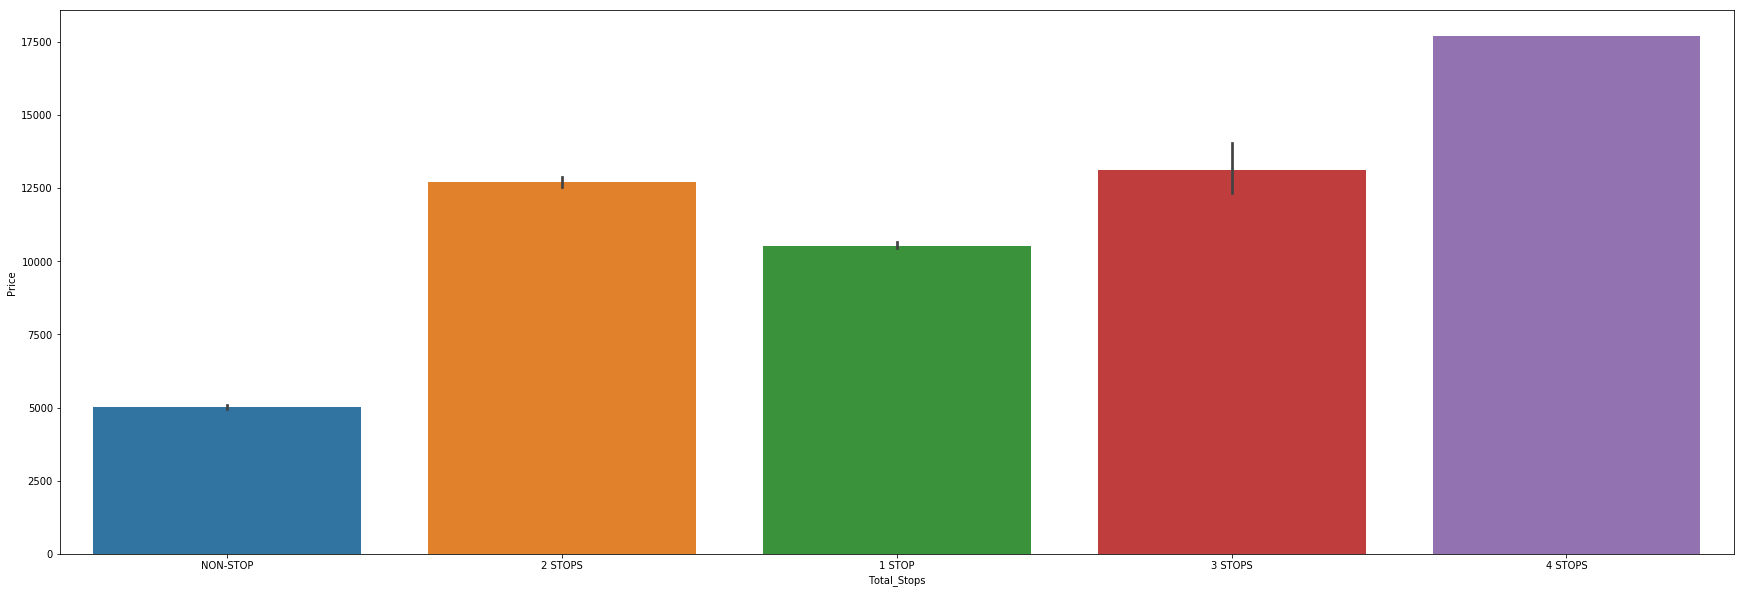

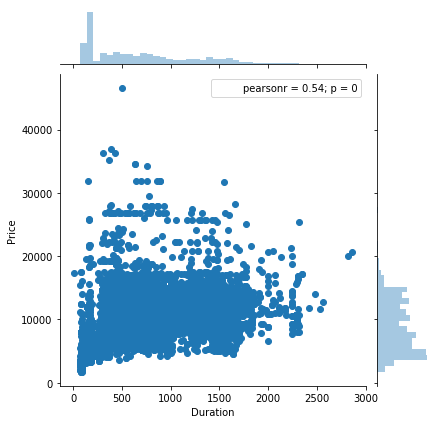

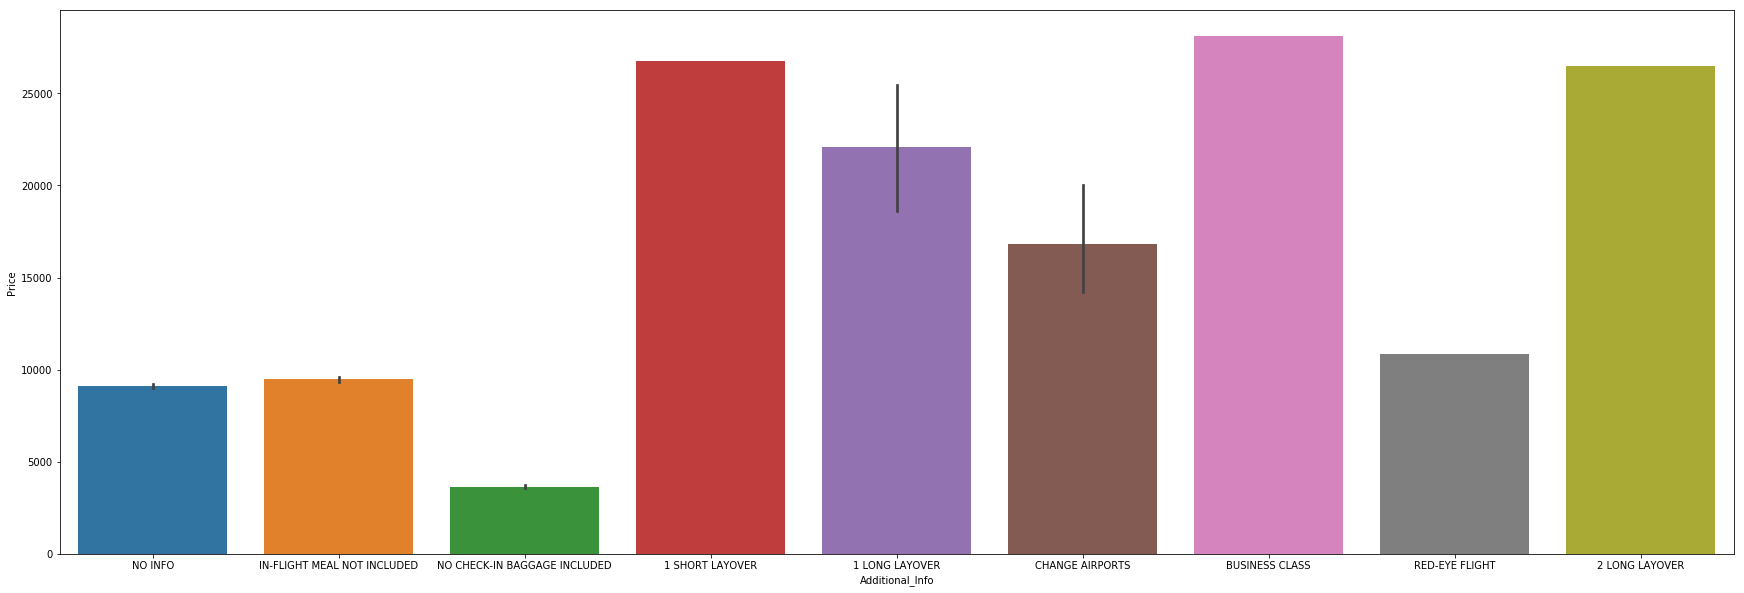

In [13]:
plt.figure(figsize=(30,10))
sns.barplot(x='Total_Stops',y='Price',data=df)
plt.figure(figsize=(30,10))
sns.jointplot(x='Duration',y='Price',data=df)
plt.figure(figsize=(30,10))
sns.barplot(x='Additional_Info',y='Price',data=df)

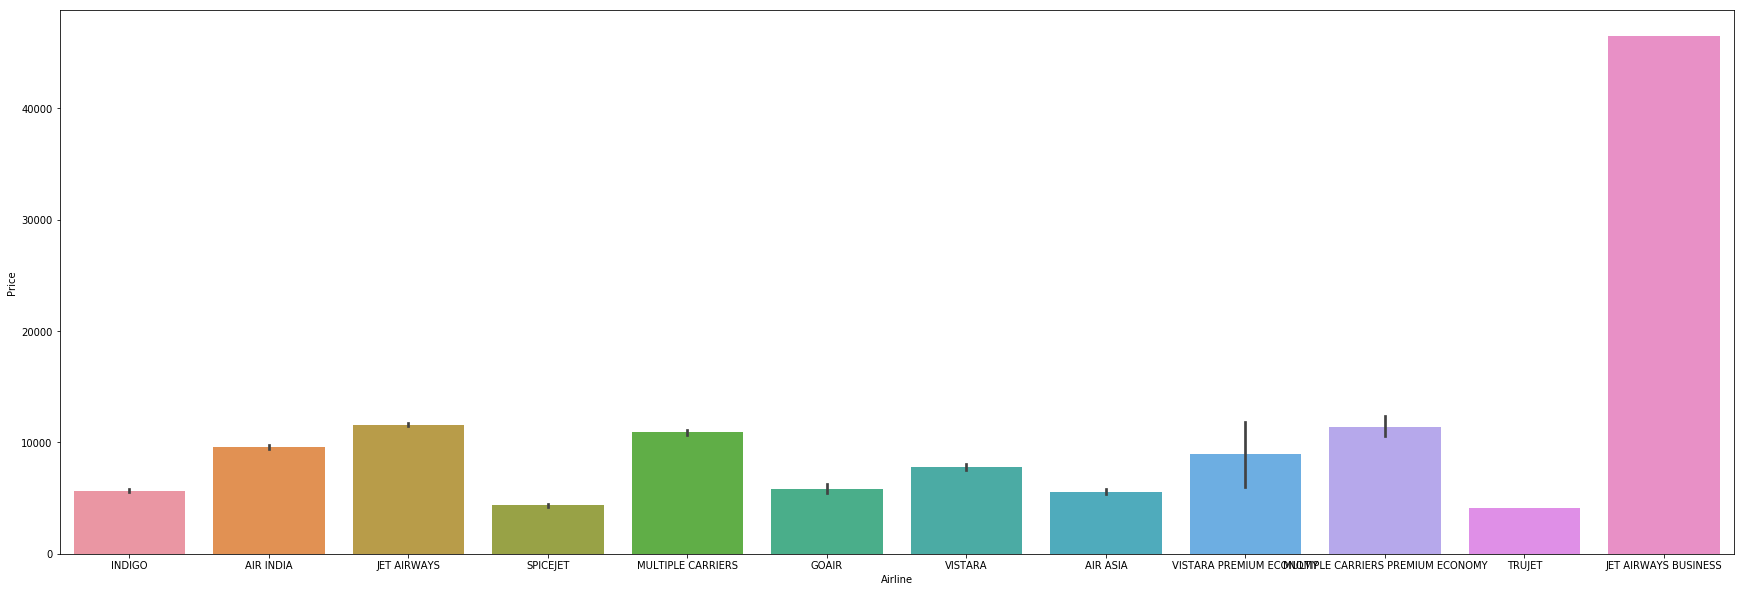

In [14]:
plt.figure(figsize=(30,10))
sns.barplot(x='Airline',y='Price',data=df)

In [15]:
# def cleaning_stops(x):
#     stop_convert = {'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4}
#     return stop_convert[x]
# df['Total_Stops'] = df['Total_Stops'].apply(lambda x: cleaning_stops(x))
# df.head()

In [16]:
# def cleaning_info(x):
#     info_convert = {'NO INFO':0, 'IN-FLIGHT MEAL NOT INCLUDED':1,'NO CHECK-IN BAGGAGE INCLUDED':2, 
#                     '1 SHORT LAYOVER':3,'1 LONG LAYOVER':4, 'CHANGE AIRPORTS':5, 
#                     'BUSINESS CLASS':6,'RED-EYE FLIGHT':7, '2 LONG LAYOVER':8}
#     return info_convert[x]
# df['Additional_Info'] = df['Additional_Info'].apply(lambda x: cleaning_info(x))
# df.head()

In [17]:
# print(df['Airline'].unique(),end='\n')
# print(df['Source'].unique(),end='\n')
# print(df['Destination'].unique(),end='\n')

In [18]:
# def cleaning_airline(x):
#     airline_dict = {'IndiGo':0,'Air India':1, 'Jet Airways':2, 'SpiceJet':3, 'Multiple carriers':4, 'GoAir':5,
#      'Vistara':6, 'Air Asia':7, 'Vistara Premium economy':8, 'Jet Airways Business':9,
#      'Multiple carriers Premium economy':10, 'Trujet':11}
#     return airline_dict[x]

# def cleaning_places(x):
#     place_dict = {'Banglore':0, 'Kolkata':1, 'New Delhi':2,'Delhi':2, 'Chennai':3, 'Mumbai':4,'Cochin':5,'Hyderabad':6}
#     return place_dict[x]

# df['Airline'] = df['Airline'].apply(lambda x: cleaning_airline(x))
# df['Source'] = df['Source'].apply(lambda x: cleaning_places(x))
# df['Destination'] = df['Destination'].apply(lambda x: cleaning_places(x))


In [19]:
X = df[['Airline','Source','Destination','Duration','Total_Stops','Additional_Info','Month','Date','Day_of_week']]
Y = df[['Price']]
# 'Dep_Time','Arrival_Time' not considered

In [20]:
X = pd.get_dummies(X,drop_first=True)
print(X.columns,len(list(X.columns)))

Index(['Duration', 'Date', 'Airline_AIR INDIA', 'Airline_GOAIR',
       'Airline_INDIGO', 'Airline_JET AIRWAYS', 'Airline_JET AIRWAYS BUSINESS',
       'Airline_MULTIPLE CARRIERS',
       'Airline_MULTIPLE CARRIERS PREMIUM ECONOMY', 'Airline_SPICEJET',
       'Airline_TRUJET', 'Airline_VISTARA', 'Airline_VISTARA PREMIUM ECONOMY',
       'Source_CHENNAI', 'Source_KOLKATA', 'Source_MUMBAI', 'Source_NEW DELHI',
       'Destination_COCHIN', 'Destination_HYDERABAD', 'Destination_KOLKATA',
       'Destination_NEW DELHI', 'Total_Stops_2 STOPS', 'Total_Stops_3 STOPS',
       'Total_Stops_4 STOPS', 'Total_Stops_NON-STOP',
       'Additional_Info_1 SHORT LAYOVER', 'Additional_Info_2 LONG LAYOVER',
       'Additional_Info_BUSINESS CLASS', 'Additional_Info_CHANGE AIRPORTS',
       'Additional_Info_IN-FLIGHT MEAL NOT INCLUDED',
       'Additional_Info_NO CHECK-IN BAGGAGE INCLUDED',
       'Additional_Info_NO INFO', 'Additional_Info_RED-EYE FLIGHT', 'Month_12',
       'Month_3', 'Month_4', 'Month_5'

In [21]:
import numpy as np
import statsmodels.formula.api as sm
X = np.append(arr=X,values = np.ones((len(X),1)).astype(int),axis =1)
X

array([[ 170,   24,    0, ...,    0,    1,    1],
       [ 445,    5,    1, ...,    1,    0,    1],
       [1140,    6,    0, ...,    0,    0,    1],
       ...,
       [ 180,   27,    0, ...,    1,    0,    1],
       [ 160,    3,    0, ...,    0,    0,    1],
       [ 500,    5,    1, ...,    0,    0,    1]], dtype=int64)

In [22]:
X

array([[ 170,   24,    0, ...,    0,    1,    1],
       [ 445,    5,    1, ...,    1,    0,    1],
       [1140,    6,    0, ...,    0,    0,    1],
       ...,
       [ 180,   27,    0, ...,    1,    0,    1],
       [ 160,    3,    0, ...,    0,    0,    1],
       [ 500,    5,    1, ...,    0,    0,    1]], dtype=int64)

In [23]:
# import statsmodels.formula.api as sm
# def backwardElimination(x, SL):
#     numVars = len(x[0])
#     temp = np.zeros(X.shape).astype(int)
#     for i in range(0, numVars):
#         regressor_OLS = sm.OLS(Y, x).fit()
#         maxVar = max(regressor_OLS.pvalues).astype(float)
#         adjR_before = regressor_OLS.rsquared_adj.astype(float)
#         if maxVar > SL:
#             for j in range(0, numVars - i):
#                 if (regressor_OLS.pvalues[j].astype(float) == maxVar):
#                     temp[:,j] = x[:, j]
#                     x = np.delete(x, j, 1)
#                     tmp_regressor = sm.OLS(Y, x).fit()
#                     adjR_after = tmp_regressor.rsquared_adj.astype(float)
#                     if (adjR_before >= adjR_after):
#                         x_rollback = np.hstack((x, temp[:,[0,j]]))
#                         x_rollback = np.delete(x_rollback, j, 1)
#                         print (regressor_OLS.summary())
#                         return x_rollback
#                     else:
#                         continue
#     regressor_OLS.summary()
#     return x

import statsmodels.formula.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    print(regressor_OLS.summary())
    return x

SL = 0.05
X_opt = X[:,:]
X_Modeled = backwardElimination(X_opt, SL)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     827.7
Date:                Mon, 01 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:34:12   Log-Likelihood:                -98404.
No. Observations:               10674   AIC:                         1.969e+05
Df Residuals:                   10644   BIC:                         1.971e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -94.8382      3.414    -27.779      0.0

In [24]:
# df['Dep_Time'] = pd.to_datetime(df['Dep_Time'],format= '%H:%M' ).dt.time
# df['Dept_new']=-1

# df.loc[(df['Dep_Time']>'04:00')&(df['Dep_Time']<='08:00'),'Dept_new']=0 #early morning
# df.loc[(df['Dep_Time']>'08:00')&(df['Dep_Time']<='12:00'),'Dept_new']=1 #morning
# df.loc[(df['Dep_Time']>'12:00')&(df['Dep_Time']<='18:00'),'Dept_new']=2 #afternoon
# df.loc[(df['Dep_Time']>'18:00')&(df['Dep_Time']<='21:00'),'Dept_new']=3 # early evening
# df.loc[(df['Dep_Time']>'21:00')&(df['Dep_Time']<='00:00'),'Dept_new']=4 # night
# df.loc[(df['Dep_Time']>'00:00')&(df['Dep_Time']<='04:00'),'Dept_new']=5 # late night

# #----------------------------------------------------------------
# df['Arrival_new']=-1
# df.loc[(df['Arrival_Time']>'04:00')&(df['Arrival_Time']<='08:00'),'Arrival_new']=0 #early morning
# df.loc[(df['Arrival_Time']>'08:00')&(df['Arrival_Time']<='12:00'),'Arrival_new']=1 #morning
# df.loc[(df['Arrival_Time']>'12:00')&(df['Arrival_Time']<='18:00'),'Arrival_new']=2 #afternoon
# df.loc[(df['Arrival_Time']>'18:00')&(df['Arrival_Time']<='21:00'),'Arrival_new']=3 # early evening
# df.loc[(df['Arrival_Time']>'21:00')&(df['Arrival_Time']<='24:00'),'Arrival_new']=4 # night
# df.loc[(df['Arrival_Time']>'24:00')&(df['Arrival_Time']<='04:00'),'Arrival_new']=5 # late night

# df[df['Dept_new']==-1]

In [25]:
# new_df = df.drop(['Dep_Time','Arrival_Time'],axis=1)
# new_df.head(3)

In [26]:
# sns.jointplot(x='Price',y='Airline',data=new_df)
# seaborn. scatterplot (x=None, y=None, hue=None, style=None, size=None, data=None, 

In [27]:
# ,'Destination' ,'Duration', 'Month' ,'IsHoliday'
# x = new_df.drop(['Price'],axis=1)
# y = new_df['Price']

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_Modeled,Y,test_size=.20,random_state=11)

In [29]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

C:\Users\madhur_yadav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
q = model.fit(x_train,y_train)
predictions = q.predict(x_test)

In [31]:
import math
from sklearn.metrics import mean_squared_error
print('MSE-> ',mean_squared_error(y_test,predictions))
print('RMSE-> ',math.sqrt(mean_squared_error(y_test,predictions)))

MSE->  5410864.7084977655
RMSE->  2326.1265461057283


In [32]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predictions)
print('r2_score-> ',r2)

r2_score->  0.6945759099994746


In [33]:
def rmsle(y_test,y_pred) : 
    assert len(y_test) == len(y_pred)
    return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_test))**2))
w = rmsle(y_test,predictions)
print(w)
print(1-w)

Price    0.276545
dtype: float64
Price    0.723455
dtype: float64


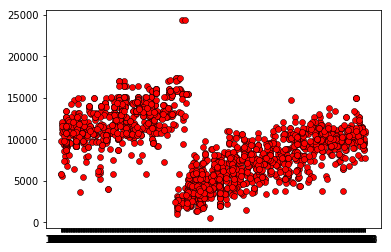

In [34]:
fig = plt.figure()

plt.scatter(y_test,predictions,lw=.5,color='red',edgecolors='black')

In [35]:
pred = pd.DataFrame(predictions,columns=['Pred'])
y_test = y_test.reset_index(drop=True)
pred = pred.reset_index(drop=True)
pred['y_test'] = y_test['Price']
pred.head()


,Pred,y_test
0,6834.958775,4544
1,9543.958775,8834
2,5562.208775,3670
3,10574.208775,8586
4,7989.458775,6442


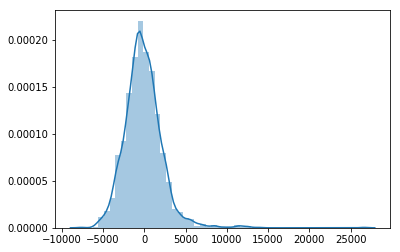

In [36]:
sns.distplot(y_test-predictions)

In [37]:
# for i in range(len(x_train[0])):
#     plt.scatter(x_train[:,i],y_train,lw=.5,color='red',edgecolors='black')
#     plt.xlabel(str(i))
    
#     plt.show()
#     if(input()=='y'):
#         continue
# plt.figure(np.abs(x_train[:,0]),np.abs(q.predict(x_train)),color='blue')
# print(len(x_train),len(y_train),len(x_test),len(y_test))

In [38]:
# madhur
# plt.scatter(x_test,y_test,color='red')
# plt.plot(x_test,q.predict(x_test),color='blue')

In [39]:
# shiwangi
# plt.scatter(x_test,y_test,color='red')
# plt.plot(x_test,q.predict(x_train),color='blue')

In [40]:
from sklearn.ensemble import RandomForestRegressor